# Data Generator

I started with a basic dataset with the ranges below and 1 sample each.
- Match score: 0-100 with 10 point increments
- Preview length: 30-120 with 5 second increments
- Tile size: 0.1, 0.2, 0.3, 0.4, 0.5
- Preview type: 'TT', 'AC'

In [14]:
import pandas as pd

# Define possible values for each factor
match_score_values = range(0, 101, 10)  # Match scores
prev_length_values = range(30, 121, 5)  # Preview lengths (5-second increments)
tile_size_values = [0.1, 0.2, 0.3, 0.4, 0.5]
prev_type_values = ['TT', 'AC']
sample_size_values = [5]

# Create a DataFrame with all unique combinations
data = [
    {"Match.Score": ms, "Prev.Length": pl, "Tile.Size": ts, "Prev.Type": pt, 'Sample.Size': ss}
    for ms in match_score_values
    for pl in prev_length_values
    for ts in tile_size_values
    for pt in prev_type_values
    for ss in sample_size_values
]

df = pd.DataFrame(data)

# # Shuffle the DataFrame
df = df.sample(frac=1).reset_index(drop=True)

# Save to CSV (uncomment to save)
df.to_csv('MSDSGR22.csv', index=False)

# Display the total combinations and the DataFrame
print(f"Total combinations: {len(df)}")
print(df)

Total combinations: 2090
      Match.Score  Prev.Length  Tile.Size Prev.Type  Sample.Size
0              90           40        0.4        TT            5
1               0           40        0.4        AC            5
2              10          110        0.2        TT            5
3              60           60        0.1        AC            5
4              40           95        0.1        TT            5
...           ...          ...        ...       ...          ...
2085           50           90        0.1        AC            5
2086           60           40        0.4        TT            5
2087           20           80        0.5        TT            5
2088          100           45        0.1        TT            5
2089           60          110        0.1        AC            5

[2090 rows x 5 columns]


In [15]:
import pandas as pd
import numpy as np

data = pd.read_csv('RESULTS_MSDSGR22_0.csv')
data.head()

,Prev.Length,Match.Score,Tile.Size,Prev.Type,Browse.Time
0,40,90,0.4,TT,14.500175
1,40,90,0.4,TT,12.643140
2,40,90,0.4,TT,14.342910
3,40,90,0.4,TT,11.842241
4,40,90,0.4,TT,14.124482


In [16]:
data.describe()

,Prev.Length,Match.Score,Tile.Size,Browse.Time
count,10450.000000,10450.00000,10450.000000,10450.000000
mean,75.000000,50.00000,0.300000,19.629495
std,27.387438,31.62429,0.141428,3.896342
min,30.000000,0.00000,0.100000,7.855631
25%,50.000000,20.00000,0.200000,17.090750
50%,75.000000,50.00000,0.300000,19.652644
75%,100.000000,80.00000,0.400000,22.864195
max,120.000000,100.00000,0.500000,28.043801


In [18]:
data.rename(columns={'Browse.Time': 'browse_time', 'Tile.Size': 'tile_size', 'Match.Score': 'match_score', 'Prev.Length': 'prev_length', 'Prev.Type': 'prev_type'}, inplace=True)

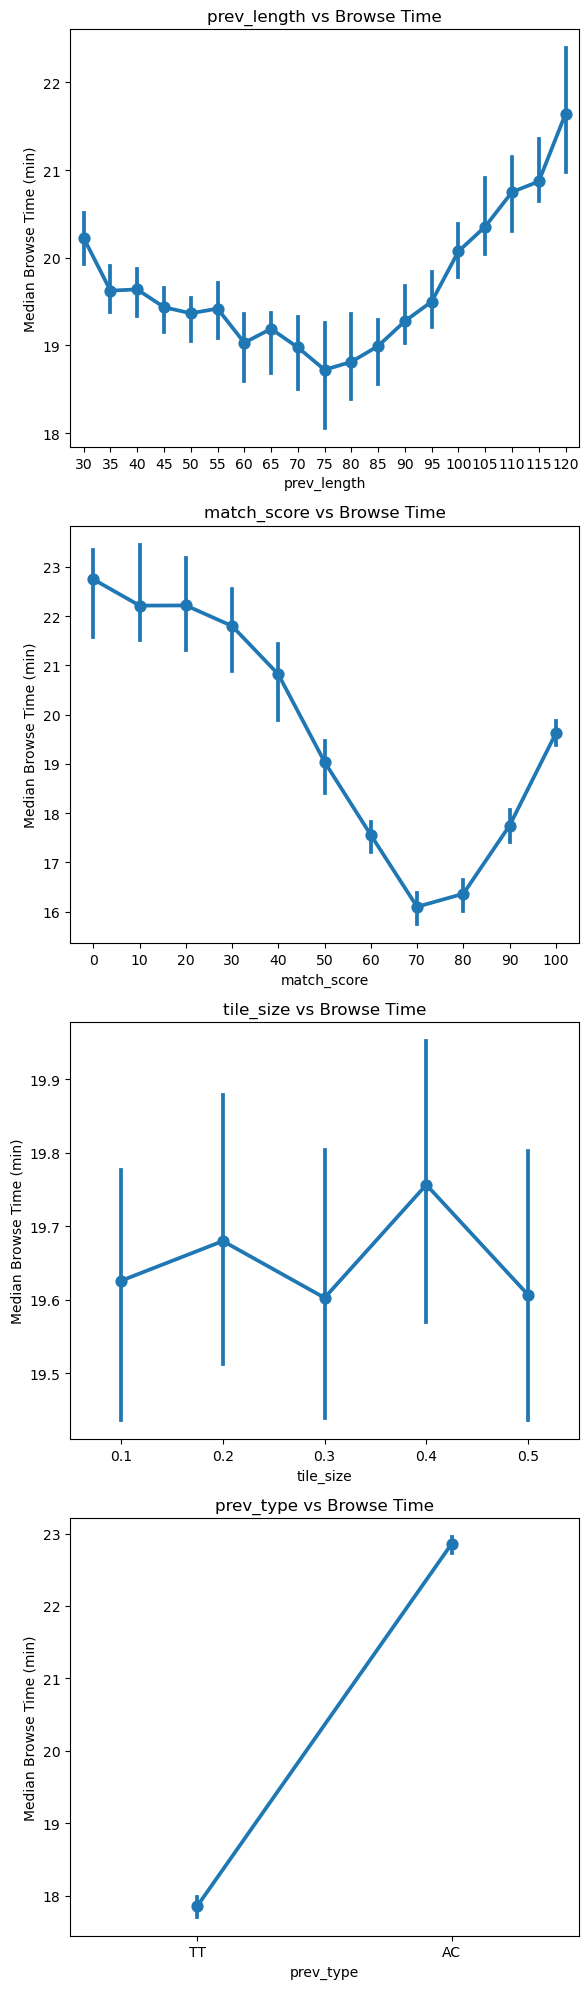

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

factors = ['prev_length', 'match_score', 'tile_size', 'prev_type']

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(6, 20))
axes = [ax1, ax2, ax3, ax4]

for i, factor in enumerate(factors):
    sns.pointplot(data=data, x=factor, y='browse_time', ax=axes[i], estimator=np.median)
    axes[i].set_title(f'{factor} vs Browse Time')
    axes[i].set_ylabel('Median Browse Time (min)')
    axes[i].set_xlabel(factor)

plt.tight_layout()
plt.show()

In [22]:
diff = data['browse_time'].max() - data['browse_time'].min()
std = data['browse_time'].std()

In [41]:
diff

20.188170070199313

In [40]:
import scipy

def ssd_t_test(delta, sd, siglevel, power):
    def foo(n, delta, sd, siglevel, power):
      tstar = scipy.stats.t.ppf(1-siglevel, df = 2 * (n - 1))
      f = 1 - scipy.stats.t.cdf(tstar - (delta/sd) * np.sqrt(n/2), df = 2 * (n - 1)) - power
      return f
    n = scipy.optimize.brentq(foo, 2, 1e+07, args = (delta, sd, siglevel, power))
    return np.ceil(n)

ssd_t_test(0.5, 1.5, 0.05, 0.95)

196.0

From this initial sample data, we decided to use 3 as the sample size for each combination. Also we decreased the range according to the graphs as below.
- Match score: 60-100 with 10 point increments
- Preview length: 50-75 with 5 second increments
- Tile size: 0.1, 0.2, 0.3, 0.4, 0.5
- Preview type: 'TT', 'AC'

## New data within range

In [36]:
import pandas as pd

# Define possible values for each factor
match_score_values = range(60, 91)  # Match scores
prev_length_values = range(60, 95, 5)  # Preview lengths (5-second increments)
tile_size_values = [0.1, 0.2, 0.3, 0.4, 0.5]
prev_type_values = ['TT', 'AC'] 
sample_size_values = [3]

# Create a DataFrame with all unique combinations
data = [
    {"Match.Score": ms, "Prev.Length": pl, "Tile.Size": ts, "Prev.Type": pt, 'Sample.Size': ss}
    for ms in match_score_values
    for pl in prev_length_values
    for ts in tile_size_values
    for pt in prev_type_values
    for ss in sample_size_values
]

df = pd.DataFrame(data)

# # Shuffle the DataFrame
df = df.sample(frac=1).reset_index(drop=True)

# Save to CSV (uncomment to save)
df.to_csv('MSDSGR22-exp2_2.csv', index=False)

# Display the total combinations and the DataFrame
print(f"Total combinations: {len(df)}")
print(df)

Total combinations: 2170
      Match.Score  Prev.Length  Tile.Size Prev.Type  Sample.Size
0              82           70        0.1        TT            3
1              75           90        0.3        TT            3
2              86           90        0.4        TT            3
3              79           85        0.3        TT            3
4              74           85        0.4        AC            3
...           ...          ...        ...       ...          ...
2165           88           80        0.5        AC            3
2166           69           70        0.5        TT            3
2167           63           65        0.4        AC            3
2168           85           75        0.4        AC            3
2169           87           80        0.2        TT            3

[2170 rows x 5 columns]


In [35]:
2170*3

6510

***Go to project.ipynb***

We got 4 for this dataset when I increased power and lowered alpha (see project.ipynb), so we will use 3 data points to check the below range.
- Match score: 70-80 with 10 point increments
- Preview length: 60-70 with 5 second increments
- Tile size: 0.2 (default as it showed that this is insignificant)
- Preview type: 'TT'

# Fixed Tile Size and Preview Type

In [39]:
import pandas as pd

# Define possible values for each factor
# match_score_values = range(70, 81)  # Match scores (inclusive)
# prev_length_values = range(60, 71, 5)  # Preview lengths (5-second increments)
# tile_size_values = [0.2]  # Tile size fixed
# prev_type_values = ['TT']  # Preview type fixed
# sample_size_values = [4]  # Sample sizes

match_score_values = range(70, 81)  # Match scores (inclusive)
prev_length_values = range(70, 81, 5)  # Preview lengths (5-second increments)
tile_size_values = [0.2]  # Tile size fixed
prev_type_values = ['TT']  # Preview type fixed
sample_size_values = [4]  # Sample sizes

# Create a DataFrame with all unique combinations
data = [
    {"Match.Score": ms, "Prev.Length": pl, "Tile.Size": ts, "Prev.Type": pt, 'Sample.Size': ss}
    for ms in match_score_values
    for pl in prev_length_values
    for ts in tile_size_values
    for pt in prev_type_values
    for ss in sample_size_values
]

df = pd.DataFrame(data)

# # Shuffle the DataFrame
df = df.sample(frac=1).reset_index(drop=True)

# Save to CSV (uncomment to save)
df.to_csv('MSDSGR22_ex2.csv', index=False)

# Display the total combinations and the DataFrame
print(f"Total combinations: {len(df)}")
print(df)

Total combinations: 33
    Match.Score  Prev.Length  Tile.Size Prev.Type  Sample.Size
0            70           70        0.2        TT            4
1            77           75        0.2        TT            4
2            77           70        0.2        TT            4
3            77           80        0.2        TT            4
4            76           70        0.2        TT            4
5            78           70        0.2        TT            4
6            73           70        0.2        TT            4
7            80           80        0.2        TT            4
8            79           80        0.2        TT            4
9            75           75        0.2        TT            4
10           79           75        0.2        TT            4
11           72           80        0.2        TT            4
12           78           80        0.2        TT            4
13           71           75        0.2        TT            4
14           72           70    

***Go to project_experiment_2.ipynb***